## Определение наилучшей модели поведения клиента банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

## Изучение и подготовка данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [2]:
try:
    df = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/Churn.csv")
except:
    df = pd.read_csv('/datasets/Churn.csv')

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Сначала переименуем столбцы в привычный для работы в Python вид:

In [5]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'rownumber': 'row_number', 'customerid': 'customer_id','creditscore': 'credit_score','numofproducts': 'num_of_products','hascrcard': 'has_cr_card','isactivemember': 'is_active_member','estimatedsalary': 'estimated_salary'})
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Столбец с информацией о том, сколько лет человек является клиентом банка, содержит довольно много пропусков (свыше 9%). 
Для того, чтобы продолжить анализ данных, необходимо заполнить недостающие значения. 
В данном случае наиболее походящим для этого является медианное значение. Оно не нарушит распределение данных внутри датасета, как могло бы произойти при заполнении средним значением.

In [6]:
tenure_median = df['tenure'].median()
df['tenure'] = df['tenure'].fillna(tenure_median)

Оставим для модели только необходимые признаки:

In [7]:
df = df.drop(['row_number','surname','customer_id'], axis=1)

Теперь подготовим данные для построения модели. Необходимо подготовить признаки путем кодирования и не попасть в дамми-ловушку:

In [8]:
df_ohe = pd.get_dummies(df, drop_first=True)

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1. Сначала выделим тестовую часть:

In [9]:
target = df_ohe['exited']
features = df_ohe.drop(['exited'], axis=1)

features_1, features_test, target_1, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

numeric = ['credit_score', 'age', 'tenure','balance', 'num_of_products','estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

model = LogisticRegression(solver='liblinear',random_state = 12345) 
model.fit(features_train, target_train)
print("Обучено!")

Обучено!


/tmp/ipykernel_138/3552865315.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_138/3552865315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

## Исследование баланса классов

Изучим, как соотносятся значения целевого признака:

In [10]:
null_share = (df['exited'] == 0).sum()/len(df['exited'])
print("Доля нулей: ", null_share*100, "%")

Доля нулей:  79.63 %


In [11]:
one_share = (df['exited'] == 1).sum()/len(df['exited'])
print("Доля единиц: ", one_share*100, "%")

Доля единиц:  20.369999999999997 %


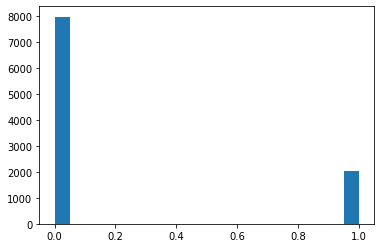

In [12]:
plt.hist(df_ohe['exited'], bins=20)
plt.show();

Получается, что нулей в 4 раза больше, чем единиц!

Проверим баланс классов модели логистической регрессии. Рассчитаем матрицу ошибок и f1-меру, а также AUC-ROC кривую:

In [13]:
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid,predicted_valid))
print(precision_score(target_valid,predicted_valid))
print(recall_score(target_valid,predicted_valid))
print(f1_score(target_valid,predicted_valid))

[[1549   60]
 [ 311   80]]
0.5714285714285714
0.20460358056265984
0.30131826741996237


In [14]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7703391568208876


Получили довольно низкий уровень F1-меры из-за очень низкого значения полноты.  

Теперь посмотрим, что покажет модель случайного леса: 

In [15]:
best_depth = 0
best_est = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for est in range(10, 101, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train,target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid,predicted_valid)
        precision_decision = precision_score(target_valid,predicted_valid)
        recall_decision = recall_score(target_valid,predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели случайного леса на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Количество деревьев:", best_est, "Максимальная глубина:", depth) 

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined a

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.5539452495974235 Точность наилучшей модели: 0.7711864406779662 Полнота наилучшей модели: 0.46547314578005117 Количество деревьев: 40 Максимальная глубина: 14


In [16]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=14) 
model.fit(features_train,target_train) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8379050704238784


Наконец, изучим результаты модели решающего дерева:

In [17]:
best_depth = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid,predicted_valid)
    precision_decision = precision_score(target_valid,predicted_valid)
    recall_decision = recall_score(target_valid,predicted_valid)
    if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели решающего дерева на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Максимальная глубина:", depth) 

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-мера наилучшей модели решающего дерева на валидационной выборке: 0.4930817610062893 Точность наилучшей модели: 0.7283950617283951 Полнота наилучшей модели: 0.45268542199488493 Максимальная глубина: 20


In [18]:
model = DecisionTreeClassifier(random_state=12345, max_depth=20)
model.fit(features_train,target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6857939435941373


В целом, алгоритм случайного леса показал наилучший результат. При этом, наивысшая точность наблюдается у алгоритма решающего дерева. Для дальнейшего улучшения f1-меры необходимо избавиться от дисбаланса значений целевого признака.

## Улучшение качества модели

### Изменение баланса классов путем балансировки

Изменим баланс классов для улучшения вменяемости модели. Сначала попробуем сделать это, используя аргумент class_weight.

In [19]:
model = LogisticRegression(solver='liblinear',random_state = 12345, class_weight='balanced') 
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid,predicted_valid))
print(precision_score(target_valid,predicted_valid))
print(recall_score(target_valid,predicted_valid))
print(f1_score(target_valid,predicted_valid))

[[1144  465]
 [ 125  266]]
0.36388508891928867
0.680306905370844
0.4741532976827095


In [20]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7725660805030526


F1-мера стала выше. Причем видно, что точность и полнота поменялись местами. Значение AUC-ROC при этом снизилось.

Посмотрим, какие результаты покажут другие алгоритмы. 

In [21]:
best_depth = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid,predicted_valid)
    precision_decision = precision_score(target_valid,predicted_valid)
    recall_decision = recall_score(target_valid,predicted_valid)
    if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели решающего дерева на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Максимальная глубина:", depth) 

F1-мера наилучшей модели решающего дерева на валидационной выборке: 0.4790874524714829 Точность наилучшей модели: 0.4623115577889447 Полнота наилучшей модели: 0.7058823529411765 Максимальная глубина: 20


In [22]:
model = DecisionTreeClassifier(random_state=12345, max_depth=20, class_weight='balanced')
model.fit(features_train,target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.677134214671628


In [23]:
best_depth = 0
best_est = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for est in range(10, 101, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced') 
        model.fit(features_train,target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid,predicted_valid)
        precision_decision = precision_score(target_valid,predicted_valid)
        recall_decision = recall_score(target_valid,predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели случайного леса на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Количество деревьев:", best_est, "Максимальная глубина:", depth) 

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.5705614567526556 Точность наилучшей модели: 0.6274509803921569 Полнота наилучшей модели: 0.5728900255754475 Количество деревьев: 60 Максимальная глубина: 14


In [24]:
model = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=14, class_weight='balanced') 
model.fit(features_train,target_train) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8470750366782756


У логистической регрессии и решающего дерева показатели улучшились. При этом, у случайного леса показатели практически не изменились. 

### Изменение баланса классов путем увеличения выборки 

Попробуем улучшить результаты, используя метод увеличения выборки:

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4771126760563381


In [26]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7725676700274511


In [27]:
best_depth = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    result = f1_score(target_valid,predicted_valid)
    precision_decision = precision_score(target_valid,predicted_valid)
    recall_decision = recall_score(target_valid,predicted_valid)
    if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели решающего дерева на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Максимальная глубина:", depth) 

F1-мера наилучшей модели решающего дерева на валидационной выборке: 0.47164948453608246 Точность наилучшей модели: 0.4623115577889447 Полнота наилучшей модели: 0.7058823529411765 Максимальная глубина: 20


In [28]:
model = DecisionTreeClassifier(random_state=12345, max_depth=20)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.6716495607349324


In [29]:
best_depth = 0
best_est = 0
best_f1 = 0
best_result = 0
best_model = None
best_precision = 0
best_recall = 0
for est in range(10, 101, 10):
    for depth in range (1, 15):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid,predicted_valid)
        precision_decision = precision_score(target_valid,predicted_valid)
        recall_decision = recall_score(target_valid,predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
            best_precision = precision_decision
            best_recall = recall_decision
print("F1-мера наилучшей модели случайного леса на валидационной выборке:", result, "Точность наилучшей модели:", best_precision, "Полнота наилучшей модели:", best_recall, "Количество деревьев:", best_est, "Максимальная глубина:", depth) 

F1-мера наилучшей модели случайного леса на валидационной выборке: 0.5899094437257439 Точность наилучшей модели: 0.589242053789731 Полнота наилучшей модели: 0.6163682864450127 Количество деревьев: 80 Максимальная глубина: 14


In [30]:
model = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14) 
model.fit(features_upsampled, target_upsampled) 
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8479484803351989


Путем перебора значений оптимальным множителем является 5. F1-мера улучшилась у алгоритма случайного леса и достигла 0.59. Показатель AUC-ROC остался примерно на том же уровне. У других двух моделей результаты не изменились. В целом, наилучшим образом себя показала модель случайного леса.

## Проверка на тестовой модели

Наконец, опробуем получившуюся модель на тестовой выборке:

In [31]:
model = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)



print("F1:", f1_score(target_test, predicted_test))

F1: 0.6260657734470159


In [32]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc)

0.8564133333134824


F1-мера заментно улучшилась, а показатель AUC-ROС также незначительно вырос. А это значит, что модель показала хорошие результаты на тестовой выборке.

## Общий вывод


В ходе тестирования было обнаружено, что наилучшие результаты показала модель случайного леса. На валидационной выборке удалось достичь требуемой F1-меры в 0.59, а также значения AUC-ROС, равного 0.85. При этом, на тестовой выборке значения F1-меры и AUC-ROC даже улучшились, что говорит о хорошем качестве модели.